# References
- https://github.com/thekimk/All-About-Time-Series-Analysis/
- https://medium.com/@ranjithkumar.rocking/time-series-model-s-arch-and-garch-2781a982b448
- https://medium.com/analytics-vidhya/arima-garch-forecasting-with-python-7a3f797de3ff

# Install and Import Necessary Libraries

In [1]:
!pip3 install arch

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(0)
rng = np.random.default_rng()

# Part 1: VAR Model

## We will visualize an example VAR(1) model

\begin{align*}
Y_{1,t} &= 5 + 0.2 Y_{1,t-1} + 0.3 Y_{2,t-1} + e_{1,t} \\
Y_{2,t} &= 3 - 0.6 Y_{1,t-1} + 1.1 Y_{2,t-1} + e_{2,t} \\
\end{align*}

### Simulate VAR model using statsmodels.tsa.vector_ar.var_model.VARProcess

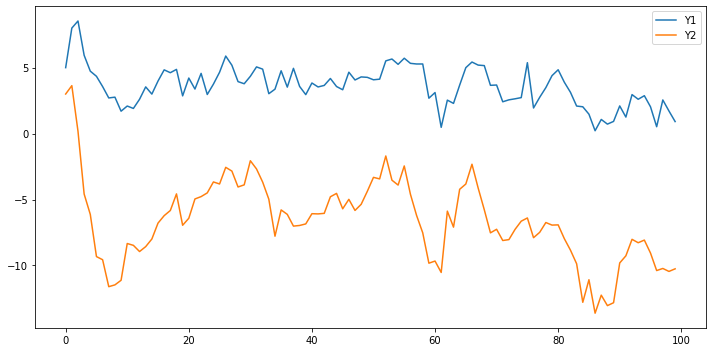

In [3]:
# model parameters 
intercept = np.array([5, 3])
coefs = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
sigma_u = np.array([[1, 0.8],[0.8, 2]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(coefs, intercept, sigma_u)
simul_values = fit.simulate_var(steps = 100, seed = 1)

# plot the figure
plt.figure(figsize=(10,5))
plt.plot(simul_values[:,0], label = "Y1")
plt.plot(simul_values[:,1], label = "Y2")
plt.legend()
plt.tight_layout()
plt.show()

# or you can do this all at once using the below code
#fit.plotsim(steps=100, seed=1)
#plt.tight_layout()
#plt.show()

### Exercise: compare the following two very simple cases to understand the interaction term in the VAR model

Case #1: $Y_{1,t}$ and $Y_{2,t}$ are independent

\begin{align*}
Y_{1,t} &= Y_{1,t-1} + e_{1,t} \\
Y_{2,t} &= Y_{2,t-1} + e_{2,t} \\
\end{align*}

Case #1: $Y_{1,t}$ and $Y_{2,t}$ have interaction term

\begin{align*}
Y_{1,t} &= Y_{1,t-1} + e_{1,t} \\
Y_{2,t} &= 0.5 Y_{1,t-1} + Y_{2,t-1} + e_{2,t} \\
\end{align*}

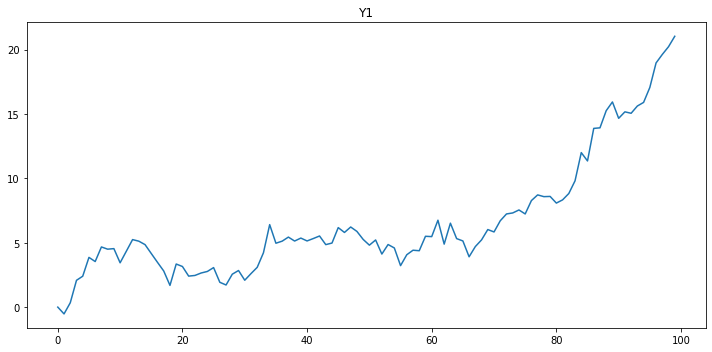

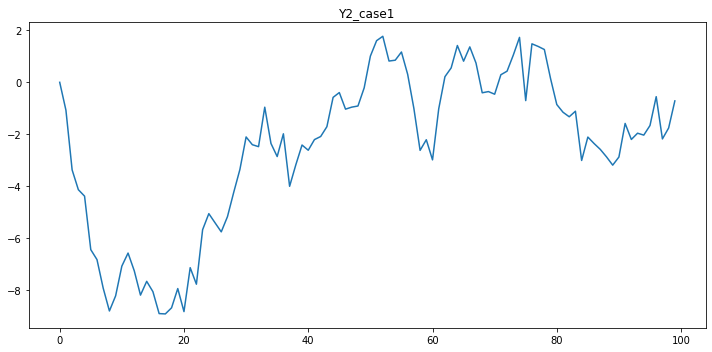

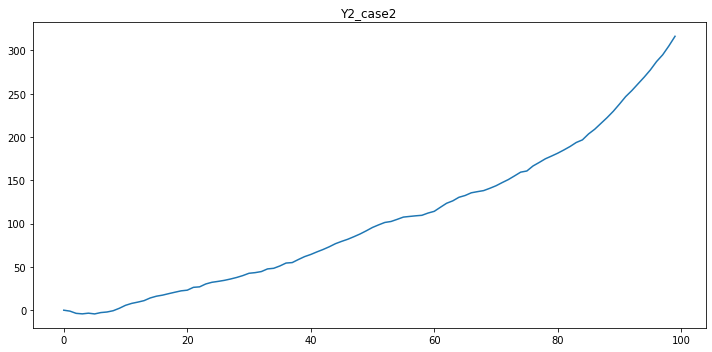

In [4]:
# model parameters 
intercept = np.array([0, 0])
coefs = np.array([[[1, 0], [0, 1]]])
sigma_u = np.array([[1, 0],[0, 1]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(coefs, intercept, sigma_u)
simul_values_case1 = fit.simulate_var(steps = 100, seed = 1)

# model parameters 
intercept = np.array([0, 0])
coefs = np.array([[[1, 0], [0.5, 1]]])
sigma_u = np.array([[1, 0],[0, 1]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(coefs, intercept, sigma_u)
simul_values_case2 = fit.simulate_var(steps = 100, seed = 1)

# plot the figure
plt.figure(figsize=(10,5))
plt.plot(simul_values_case1[:,0])
plt.title("Y1")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(simul_values_case1[:,1], label = "Y2_case1")
plt.title("Y2_case1")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(simul_values_case2[:,1])
plt.title("Y2_case2")
plt.tight_layout()
plt.show()

### We can also use statsmodels.tsa.vector_ar.util.varsim for VAR simulation

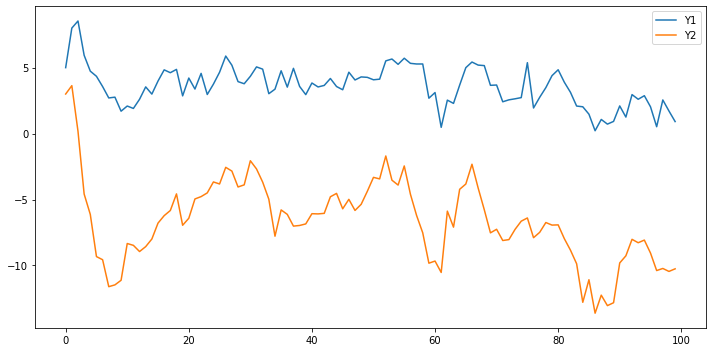

In [5]:
# model parameters 
intercept = np.array([5, 3])
coefs = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
sigma_u = np.array([[1, 0.8],[0.8, 2]])

simul_values = statsmodels.tsa.vector_ar.util.varsim(coefs, intercept, sigma_u, steps=100, seed = 1)

plt.figure(figsize=(10,5))
plt.plot(simul_values[:,0], label = "Y1")
plt.plot(simul_values[:,1], label = "Y2")
plt.legend()
plt.tight_layout()
plt.show()

### Plot the ACF of the VAR model

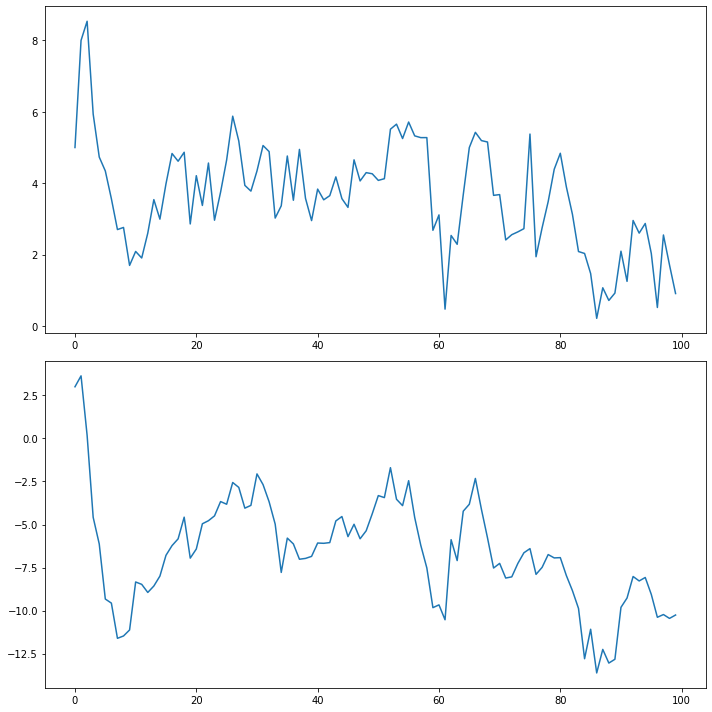

(2, 2, 2)


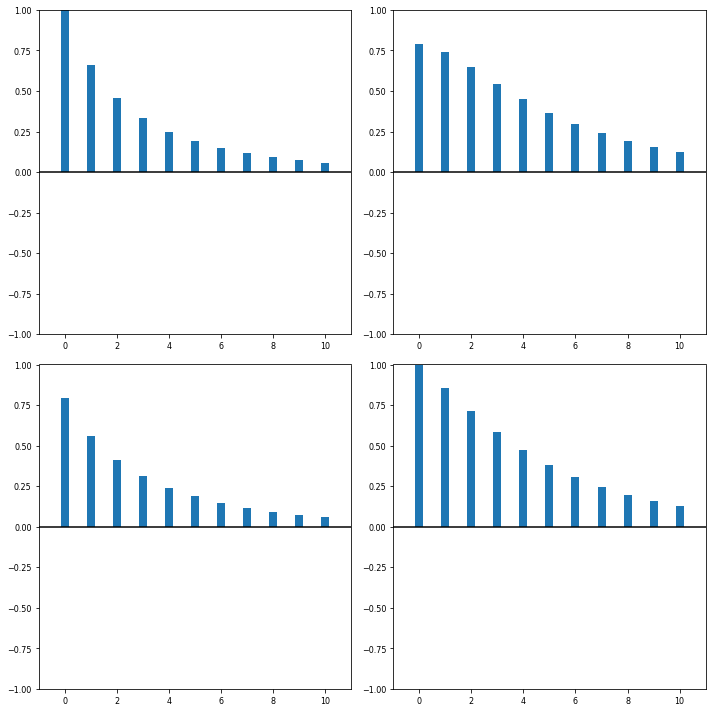

In [6]:
# model parameters 
intercept = np.array([5, 3])
Phi = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
residual_covariance = np.array([[1, 0.8],[0.8, 2]])

# simulate data
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(Phi, intercept, residual_covariance)
fit.plotsim(steps=100, seed=1)
plt.tight_layout()
plt.show()

acorr = fit.acorr(nlags = 1)
print(acorr.shape)
fit.plot_acorr()
plt.tight_layout()
plt.show()

### Fit the VAR model using sm.tsa.VAR

In [7]:
# simulate VAR model
intercept = np.array([5, 3])
coefs = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
sigma_u = np.array([[1, 0.8],[0.8, 2]])

simul_values = statsmodels.tsa.vector_ar.util.varsim(coefs, intercept, sigma_u, steps=100, seed = 1)

# fit the VAR model
fit = sm.tsa.VAR(simul_values).fit()

### The fitted result has the following parameters

| 출력모듈 | 설명 |
|--------------|-------------------------------------------------|
| model | 추정 자료와 모형 차수 등을 가진 VAR 클래스 객체 |
| k_ar | AR 차수 |
| coefs | 추정된 AR 계수 |
| intercept | 추정된 trend constant |
| params | 추정된 전체 계수 (trend constant 포함) |
| bse | 추정된 전체 계수의 표준 오차 |
| tvalues | 추정된 계수의 t statistics |
| pvalues | 추정된 계수의 t statistics에 대한 p value |
| llf | Log Likelihood 값 |
| aic | AIC 값 |
| bic | AIC 값 |
| hqic | HQIC 값 |
| fittedvalues | 추정 모형에 의한 예측값 |
| resid | 추정 모형에 의한 잔차항(Residuals) |
| sigma_u | 추정 모형에 의한 잔차항의 분산 |

In [8]:
print(fit.coefs)

[[[ 0.13459757  0.3507766 ]
  [-0.65136861  1.10434087]]]


In [9]:
display(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Aug, 2022
Time:                     14:18:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.113719
Nobs:                     99.0000    HQIC:                 0.0200743
Log likelihood:          -272.794    FPE:                   0.957409
AIC:                   -0.0435615    Det(Omega_mle):        0.901919
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         5.415872         0.632473            8.563           0.000
L1.y1         0.134598         0.097057            1.387           0.166
L1.y2         0.350777         0.046319            7.573           0.000

Results for equation 

### Forecast future values using the fitter model

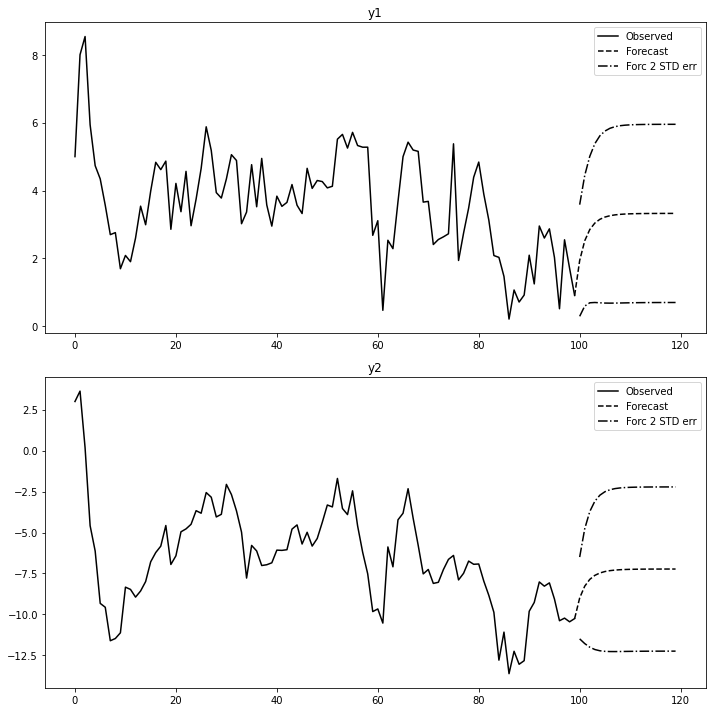

In [10]:
forecast_num = 20
pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)
fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# Part 2: ARCH & GARCH Models

## First, create a sample ARCH(1) data

\begin{align*}
y_{t} &= \sigma_{t} \cdot z_{t}, \\
z_{t} &\sim N(0,1) \\
%{\sigma_{t}}^2 &= \sum_{i=1}^{p} {y_{t-i}}^2 \\
{\sigma_{t}}^2 &= 0.1+0.1\cdot {y_{t-i}}^2 \\
\end{align*}

### Simulate data

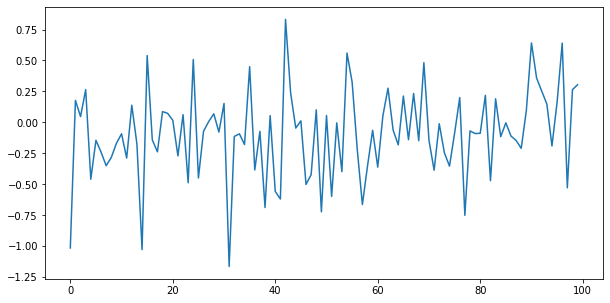

In [11]:
seed(2)

y = []
for i in range(100):
    if i == 0:
        sigma_square = gauss(0, 1)
    else:
        sigma_square = 0.1+0.1*y[-1]*y[-1]
    data = np.sqrt(sigma_square) * gauss(0, 1)
    y.append(data)
    
# plot
plt.figure(figsize=(10,5))
plt.plot(y)
plt.show()

### Fit the model 

In [12]:
seed(2)

y = []
variances = []
for i in range(100):
    if i == 0:
        sigma_square = gauss(0, 1)
    else:
        sigma_square = 0.1+0.1*y[-1]*y[-1]
    data = np.sqrt(sigma_square) * gauss(0, 1)
    y.append(data)
    variances.append(sigma_square)

# split into train/test
n_test = 10
train, test = y[:-n_test], y[-n_test:]
# define model
model = arch_model(train, vol='ARCH', p=1)
# fit model
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 624.9173768976748
Iteration:      2,   Func. Count:     12,   Neg. LLF: 48879874.350881696
Iteration:      3,   Func. Count:     19,   Neg. LLF: 32.441795807646656
Iteration:      4,   Func. Count:     24,   Neg. LLF: 32.24667739561971
Iteration:      5,   Func. Count:     28,   Neg. LLF: 32.2466630677861
Iteration:      6,   Func. Count:     31,   Neg. LLF: 32.246663067815035
Optimization terminated successfully    (Exit mode 0)
            Current function value: 32.2466630677861
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


### Predict future variance values and visualize

/home/juheonyi/.conda/envs/py37/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


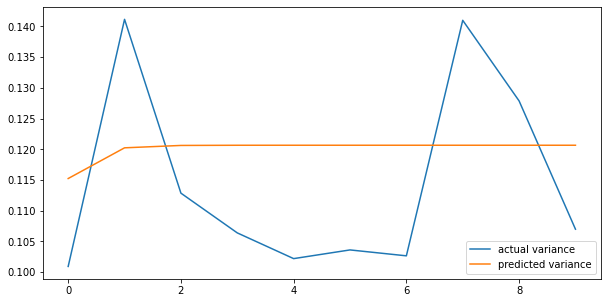

In [13]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

# plot
plt.figure(figsize=(10,5))
# plot the actual variance
plt.plot(variances[-n_test:], label = "actual variance")
# plot forecast variance
plt.plot(yhat.variance.values[-1, :], label = "predicted variance")
plt.legend()
plt.show()

## Repeat the same process with Yahoo SP500 data

### Read and visualize data

data size: (5030,)


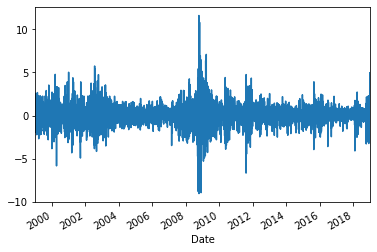

In [14]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
y = 100 * market.pct_change().dropna()
print("data size:", y.shape)
ax = y.plot()
xlim = ax.set_xlim(y.index.min(), y.index.max())

### Fit the model

In [15]:
# split into train/test
n_test = 500
train, test = y[:-n_test], y[-n_test:]
# define model
model = arch_model(train, vol='ARCH', p=15)
# fit model
model_fit = model.fit()

Iteration:      1,   Func. Count:     19,   Neg. LLF: 47647.93110349387
Iteration:      2,   Func. Count:     42,   Neg. LLF: 4791587.76670661
Iteration:      3,   Func. Count:     61,   Neg. LLF: 32302.958362801746
Iteration:      4,   Func. Count:     81,   Neg. LLF: 63377.57766765733
Iteration:      5,   Func. Count:    101,   Neg. LLF: 7798.908474628194
Iteration:      6,   Func. Count:    122,   Neg. LLF: 8324.566806085779
Iteration:      7,   Func. Count:    142,   Neg. LLF: 9399.145046857346
Iteration:      8,   Func. Count:    162,   Neg. LLF: 10574.306268498722
Iteration:      9,   Func. Count:    182,   Neg. LLF: 7718.866957659694
Iteration:     10,   Func. Count:    202,   Neg. LLF: 6984.155931129169
Iteration:     11,   Func. Count:    221,   Neg. LLF: 6928.337455750705
Iteration:     12,   Func. Count:    241,   Neg. LLF: 6690.193275474608
Iteration:     13,   Func. Count:    260,   Neg. LLF: 7097.404349482862
Iteration:     14,   Func. Count:    279,   Neg. LLF: 6712.7712

### Predict future variance values and visualize

/home/juheonyi/.conda/envs/py37/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


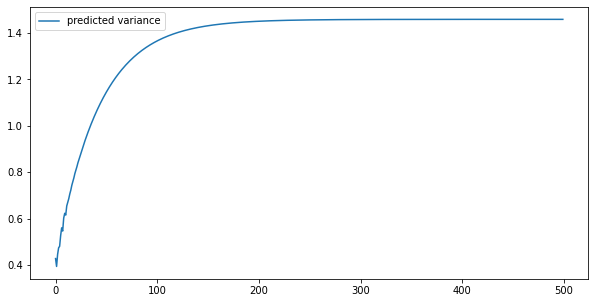

In [16]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

# plot
plt.figure(figsize=(10,5))
# plot forecast variance
plt.plot(yhat.variance.values[-1, :], label = "predicted variance")
plt.legend()
plt.show()